# Data Augmentation

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O cats_and_dogs_filtered.zip

'wget' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [6]:
from requests import get
from os import mkdir, path

folder = 'datasets/'
file_path = folder + 'cats_and_dog.zip'

if not path.exists(folder):
    mkdir(folder)

result = get('https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip', stream=True)
with open(file_path, 'wb') as f:
    for chunk in result.iter_content(chunk_size=128):
        f.write(chunk)

In [7]:
import zipfile

with zipfile.ZipFile(file_path, 'r') as file:
    file.extractall(folder)

In [9]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

data_gen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [17]:
img = load_img('datasets/cats_and_dogs_filtered/train/cats/cat.0.jpg')
x = img_to_array(img)
print(x.shape)

(374, 500, 3)


In [18]:
x = x.reshape((1,) + x.shape)
print(x.shape)

(1, 374, 500, 3)


In [20]:
if not path.exists('preview/'):
    mkdir('preview')

i = 0
for batch in data_gen.flow(x, batch_size=1, save_to_dir='preview/', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break

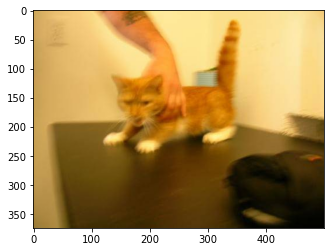

In [25]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('datasets/cats_and_dogs_filtered/train/cats/cat.0.jpg')[:,:,::-1]
plt.imshow(img)